# QMSS Hands on coding session Jan 31, 2023

Please submit this by midnight Jan 31, 2023. This will be graded for completion. You are not expected to work outside lecture hours on this assignment, so just submit what you have completed by the end of the lecture.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Housing Prices in Ames, Iowa

Find detailed information about this dataset here: https://jse.amstat.org/v19n3/decock/DataDocumentation.txt


In [3]:
# We are reading this dataset in from a website so you don't need to upload any files:
data = pd.read_csv("https://jse.amstat.org/v19n3/decock/AmesHousing.txt",sep="\t")

## Let's look at the shape of our data:
print(data.shape)
data.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
# data.columns

In [4]:
## Uncomment the below and run to see how many missing values are in each column:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
## How many values would we have if we dropped all obesrvations with missing values?
print(data.dropna().shape)

## Okay, fine, but what if we ignored the mostly empty columns like Pool and Misc Feat
print(data.drop(['Alley','Pool QC','Fence','Misc Feature'],axis=1).dropna().shape)
## We still lose 1/3 of our dataset :(

(0, 82)
(1156, 78)


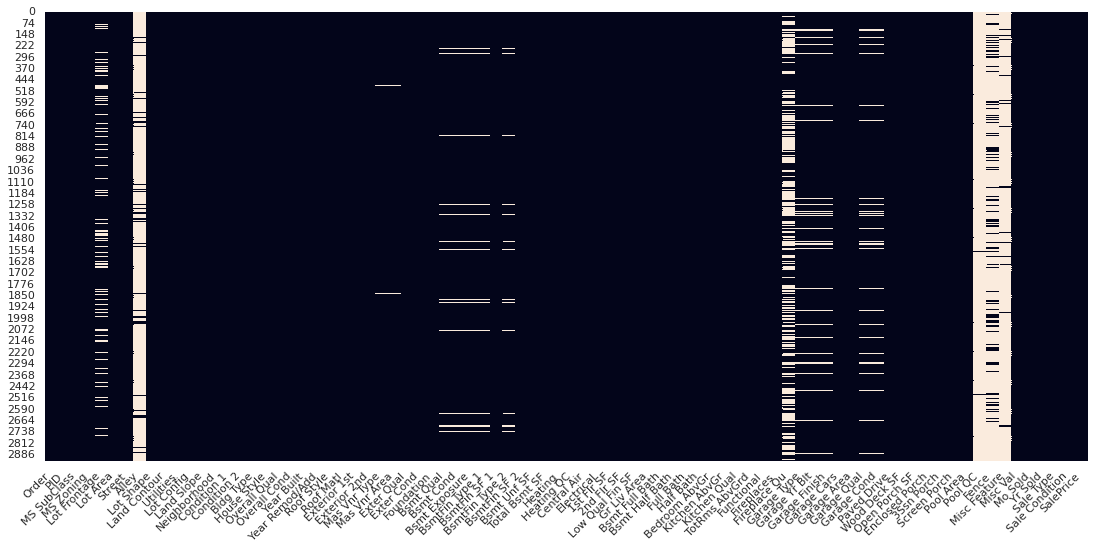

In [7]:
## Plot the missing data using seaborn

sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation=45, ha='right');

In [8]:
## How is this heatmap working?
## It's plotting the below boolean values as 0 or 1 in a heatmap:
data.isnull().head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False


The above heatmap was too crowded to interpret, let's zoom in a little bit:

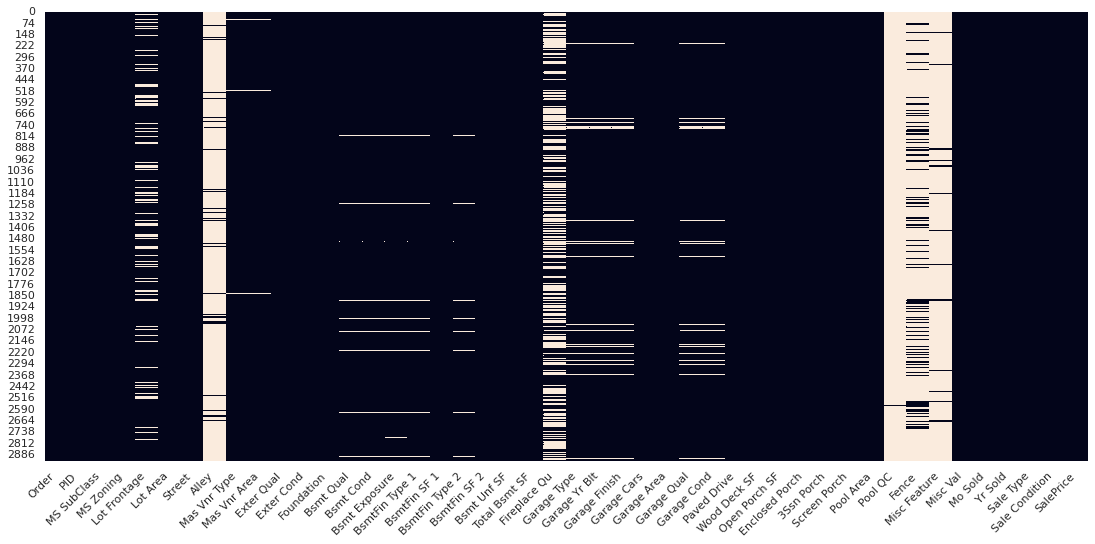

In [9]:
smaller_data = data.drop([ 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd','Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces','Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath',],axis=1)

sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.heatmap(smaller_data.isnull(), cbar=False)
plt.xticks(rotation=45, ha='right');

# Question 1: Categorical Variables
For one of the following variables, use the Pandas function `.value_counts()` to see what categories are in that column:
- Alley
- Pool Quality
- Misc Feature

You can set `dropna=False` insde the parentheses to see the count of NaNs as well.

If necessary use the website linked above to figure out what the codes mean. (ie, what does TA mean under Pool Quality?)

What does it mean when these values are empty?

In [15]:
# Your answer here

print(data["Alley"].value_counts(dropna=False))

#The empty values mean that there is no alley access for that particular unit. This is just due to the nature of the data.  

NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64


# Numerical Variables: Lot Frontage
Looking at the plot of lot frontage against Sale Price shows that there is some predictive power in the size of the front of a house's lot. Look at the scatter plot below and the correlation coefficient value.

But there are almost 500 observations missing Lot Frontage. We'll see how we can fill in the empty values for lot frontage.

Pearson Correlation Coefficient:  0.36


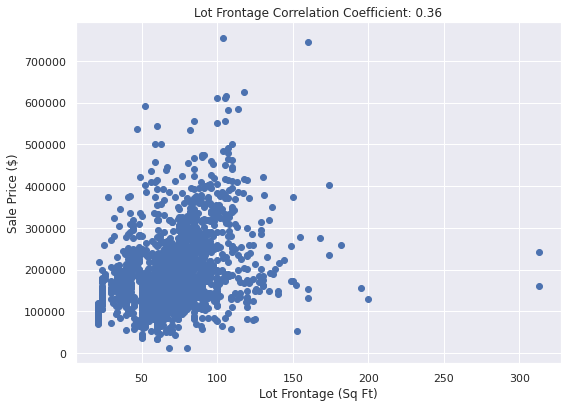

In [16]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

r = data['Lot Frontage'].corr(data['SalePrice'])
print('Pearson Correlation Coefficient: ',round(r,2))

plt.scatter(data['Lot Frontage'],data['SalePrice'])
plt.title('Lot Frontage Correlation Coefficient: '+str(round(r,2)))
plt.xlabel('Lot Frontage (Sq Ft)')
plt.ylabel('Sale Price ($)')
plt.show()

# Imputing Value for Lot Frontage

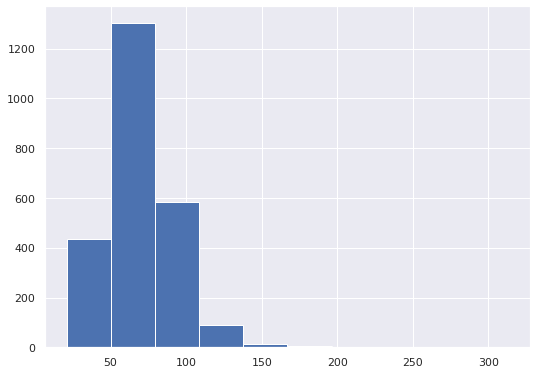

In [17]:
## From the histogram, looks like Lot Frontage ranges from 0-150 or so and has an average around 75 or 80
data['Lot Frontage'].hist()
plt.show()

In [22]:
## What if we impute the mean to complete the 500 missing values?
data['Lot Frontage - Impute Mean'] = data['Lot Frontage'].fillna(data['Lot Frontage'].mean())
# Above we use the Pandas mean() function, which is able to ignore NaN values. 
# Be careful, because Numpy's mean function cannot ignore NaNs and will error unless you use np.nanmean

# Question 2:
Now plot the histogram of the new column we created with the Mean Imputation.

Comment at least one thing that you notice for the new distribution. What has changed?

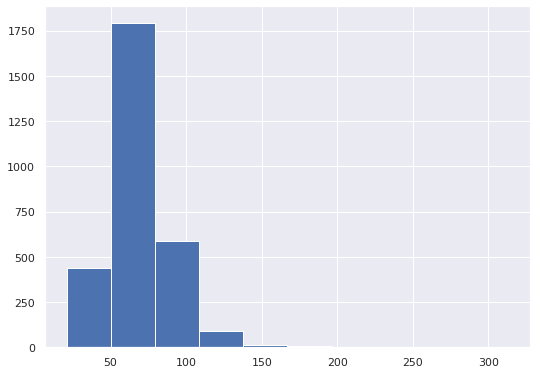

In [23]:
# I notice that the frequency of the 75 or 80 range shot up. 

data['Lot Frontage - Impute Mean'].hist()
plt.show()

# Question 3:

Now try imputing with either the median or the mode to fill in the empty values for Lot Frontage. You can use the Pandas function `.median()` or `.mode()`.

Plot the histogram again. What has changed this time?

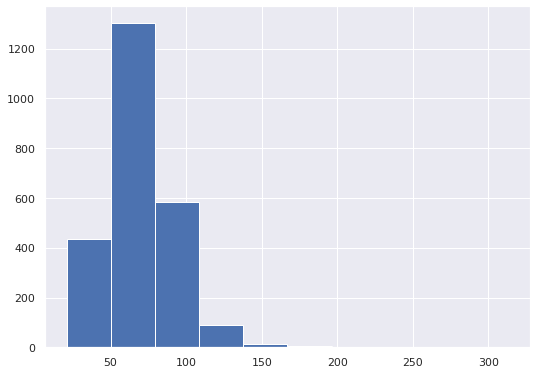

In [24]:
# It doesn't look like anything has changed. 

data['Lot Frontage - Impute Mode'] = data['Lot Frontage'].fillna(data['Lot Frontage'].mode())
data['Lot Frontage - Impute Mode'].hist()
plt.show()

# Question 4: 
##Taking context into account for imputation

Knowing that lot frontage could vary drastically by neighborhood, we could decide to use the median value from the neighborhood where the missing value is. Let's look at this:

Run the below code. How do the neighborhood median values compare to the overall dataset's median value?

Then uncomment/remove the `.head()` and see what issues there might be with this.

In [29]:
## What if we took into consideration neighborhood median?
data.groupby("Neighborhood")["Lot Frontage"].median().head()

#I don't see an issue with this. 

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
Name: Lot Frontage, dtype: float64

# Question 5 
## Let's try the neighborhood imputation:
Run the code below, have we filled in all the missing values using this method?

Comment one thing that is different about the distribution with this method. If you don't find it obvious in the histogram, you can also use the `.describe()` function to compare this method with the original Lot Frontage distribution.

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Number of Missing Values still left: 3


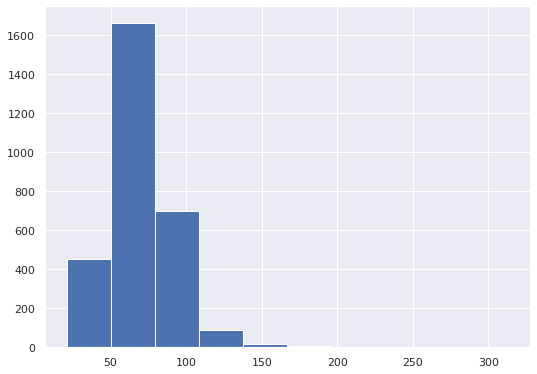

In [35]:
## Answer: No, there are still 3 missing values left. 
##In this method, there are more values which has caused the distribution to shift right a little bit. 

#don't worry about the transform and the lambda function below, 
## just understand that it is filling in all the values within a 
## neighborhood with the median value of that neighborhood
data["Lot Frontage - Impute by neighborhood median"] = data.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.median()))

## Uncomment the below to confirm an issue with using the median by neighborhood
print("Number of Missing Values still left:", data["Lot Frontage - Impute by neighborhood median"].isnull().sum())

data['Lot Frontage - Impute by neighborhood median'].hist()
plt.show()

# Random Sample Imputation

In random sample imputation, we fill in the empty values with a randomly sampled value from the rest of the dataset.

In [36]:
def RSI(df,variable):
  """
  This function takes in a dataset and a column name and mutates the dataset to contain a new column with a random sample imputation.

  df - dataset with column with missing values
  variable - string of column name to fill in via random sample imputation

  Returns: nothing -- mutates dataset without return anything (Be careful with this!)

  Thanks to https://www.kaggle.com/code/rushikeshlavate/random-sample-imputation-on-titanic-dataset
  """
  df[variable+' - Random Sample'] = df[variable].copy() #Copy feature into new feature
  # calculate random sample and store into random_sample_values
  random_sample_value = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

  # in random_sample_value all filled nan values are present now we want to put/merge this all filled values in our dataset
  # for this we want to match all nan values index in random_sample_values with df[variavle_'random] 
  # Pandas needs to have same index in order to merge dataset
  
  random_sample_value.index = df[df[variable].isnull()].index # find index of NaN values in feature
  # now put a condition where ever it is null with loc function then replace with random_sample_values
  df.loc[df[variable].isnull(),variable+' - Random Sample'] = random_sample_value

Number of Missing Values still left: 0


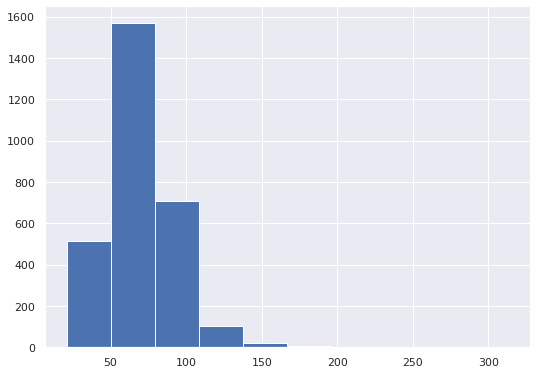

In [37]:
RSI(data,'Lot Frontage') # This mutates the dataframe `data`, so there is nothing returned by the function

print("Number of Missing Values still left:", data["Lot Frontage - Random Sample"].isnull().sum())

data['Lot Frontage - Random Sample'].hist()
plt.show()

# Question 6
##Let's compare the various imputation methods

The differences are a bit easier to see on a Kernel density estimate, which is analogous to a histogram, but continuous instead of binned.

Below, copy/paste a line of code and change the column name to add your method (either median or mode) and the neighborhood median to the plot. Compare the distributions.

Now, also plot the random sample column as well. Compare the distributions. Why does the random sample imputation look like it does?

Which imputation method would you use?

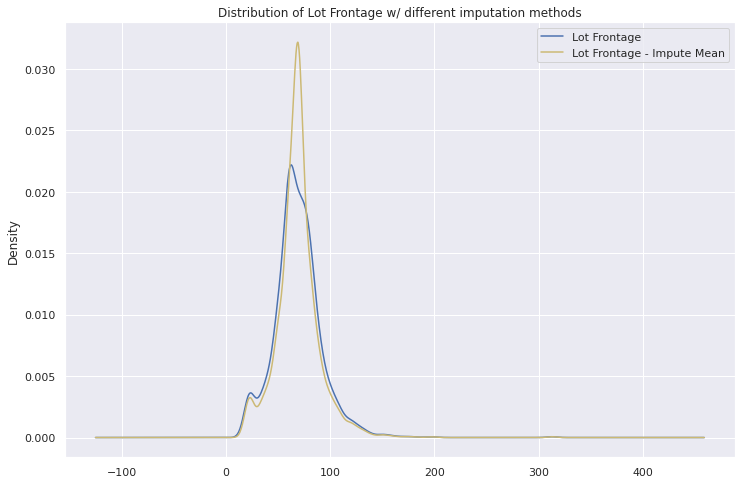

In [38]:
plt.figure(figsize=(12,8))
data["Lot Frontage"].plot(kind='kde',color='b')
data['Lot Frontage - Impute Mean'].plot(kind='kde',color='y')
# Your answer here
plt.title("Distribution of Lot Frontage w/ different imputation methods")
plt.legend()
plt.show()




# Question 7
##  Imputation and correlation with our target variable

Correlation is one way to roughly estimate the predictive power of a variable for our target variable. We saw above that Lot Frontage correlated with Sale Price with a coefficient of 0.36. (Only for complete observations).

Let's look at that correlation coefficient after imputation. Run the below code. What do you notice about the correlation coefficient? What do you think this means for the random sample imputation method?

Pearson Correlation Coefficient:  0.31


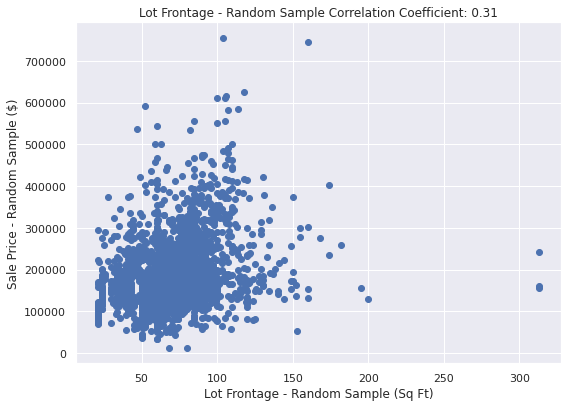

In [39]:
r = data['Lot Frontage - Random Sample'].corr(data['SalePrice'])
print('Pearson Correlation Coefficient: ',round(r,2))

plt.scatter(data['Lot Frontage - Random Sample'],data['SalePrice'])
plt.title('Lot Frontage - Random Sample Correlation Coefficient: '+str(round(r,2)))
plt.xlabel('Lot Frontage - Random Sample (Sq Ft)')
plt.ylabel('Sale Price - Random Sample ($)')
plt.show()

#I notice the correlation coefficient is lower at 0.31. I think this means the random sample imputation method shows less of a correlation when the null values are imputed, which probably means that Lot Frontage and Sales Price aren't as strongly correlated as we had thought. 

# Question 8
Find the correlation coefficent for one other imputation method and comment on the results:

In [ ]:
# Your answer here

# Question 9
What other methods could we have used here? What are some of the pros and cons for those methods?

# Bonus question
Create a function that takes a dataframe, 2 column names, and plots a scatterplot with the Pearson R coefficient printed into the title, as shown above.